'''
	@author: Sergio Betancor Bello
	@author: Diego Betancor Franco
	@version: 1.0
	@date: 17/06/2022
	@Task: Exercise 7
'''

### 1. Imports

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
import time
from sklearn.naive_bayes import GaussianNB
from joblib import dump, load
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



### 2. Data manipulation

In [106]:
data_train = pd.read_csv("./Colab/Training.csv")
data_test = pd.read_csv("./Colab/Testing.csv")

X_train = data_train.drop(columns = 'prognosis', axis=1)
Y_train = data_train['prognosis']
X_test = data_test.drop(columns = 'prognosis', axis=1)
Y_test = data_test['prognosis']


In [107]:
data_train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

### 3. Multinomial Naive Bayes

In [125]:
ini=time.time()
mnb = MultinomialNB()
mnb = mnb.fit(X_train, Y_train)
end = time.time()
print("Modelling time: ", str(end-ini) + "s")

Modelling time:  0.16762232780456543s


### 3.1 Predictions

In [109]:
mnb.score(X_test, Y_test)

1.0

In [110]:
y_pred = mnb.predict(X_test)
y_pred

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype='<U39')

### 3.2 Metrics and results

<AxesSubplot:>

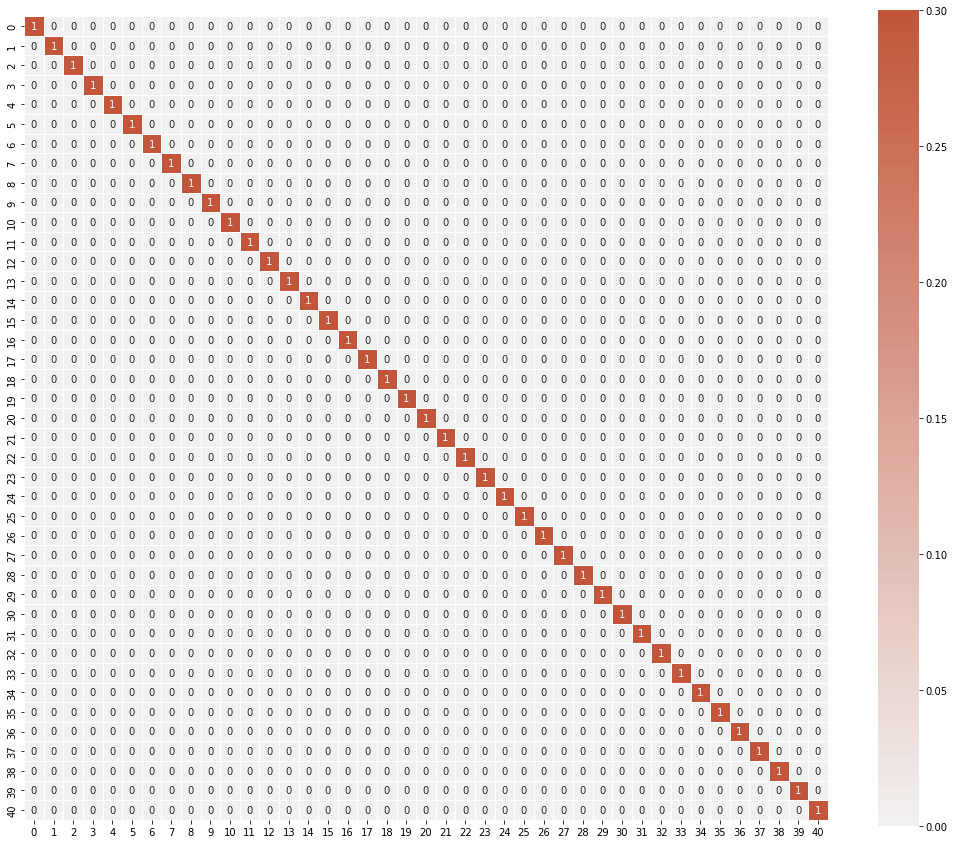

In [111]:
f, ax = plt.subplots(figsize = (18, 15))
cm = confusion_matrix(Y_test, y_pred)
cmap = sns.diverging_palette(220, 20, as_cmap = True)
sns.heatmap(cm, cmap = cmap, vmax = 0.3, center = 0,
            annot= True, square = True, linewidths= 0.5)

In [112]:
print("Classification report: ")
print(classification_report(Y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred))
print("Accuracy score: " + str(accuracy_score(y_pred, Y_test)*100) + '%')

Classification report: 
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
   

In [113]:

for i in range(0, len(Y_test)):
    print (str(i+1) + ' -> Pred: {0} => Actual: {1}'.format(y_pred[i], Y_test[i]))

1 -> Pred: Fungal infection => Actual: Fungal infection
2 -> Pred: Allergy => Actual: Allergy
3 -> Pred: GERD => Actual: GERD
4 -> Pred: Chronic cholestasis => Actual: Chronic cholestasis
5 -> Pred: Drug Reaction => Actual: Drug Reaction
6 -> Pred: Peptic ulcer diseae => Actual: Peptic ulcer diseae
7 -> Pred: AIDS => Actual: AIDS
8 -> Pred: Diabetes  => Actual: Diabetes 
9 -> Pred: Gastroenteritis => Actual: Gastroenteritis
10 -> Pred: Bronchial Asthma => Actual: Bronchial Asthma
11 -> Pred: Hypertension  => Actual: Hypertension 
12 -> Pred: Migraine => Actual: Migraine
13 -> Pred: Cervical spondylosis => Actual: Cervical spondylosis
14 -> Pred: Paralysis (brain hemorrhage) => Actual: Paralysis (brain hemorrhage)
15 -> Pred: Jaundice => Actual: Jaundice
16 -> Pred: Malaria => Actual: Malaria
17 -> Pred: Chicken pox => Actual: Chicken pox
18 -> Pred: Dengue => Actual: Dengue
19 -> Pred: Typhoid => Actual: Typhoid
20 -> Pred: hepatitis A => Actual: hepatitis A
21 -> Pred: Hepatitis B => 

### 4. Gaussian NB

In [124]:
ini = time.time()
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
end = time.time()
print("Modelling time: ", str(end-ini) + "s")

Modelling time:  0.07179498672485352s


In [115]:
y_pred = classifier.predict(X_test)
y_pred

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype='<U39')

<AxesSubplot:>

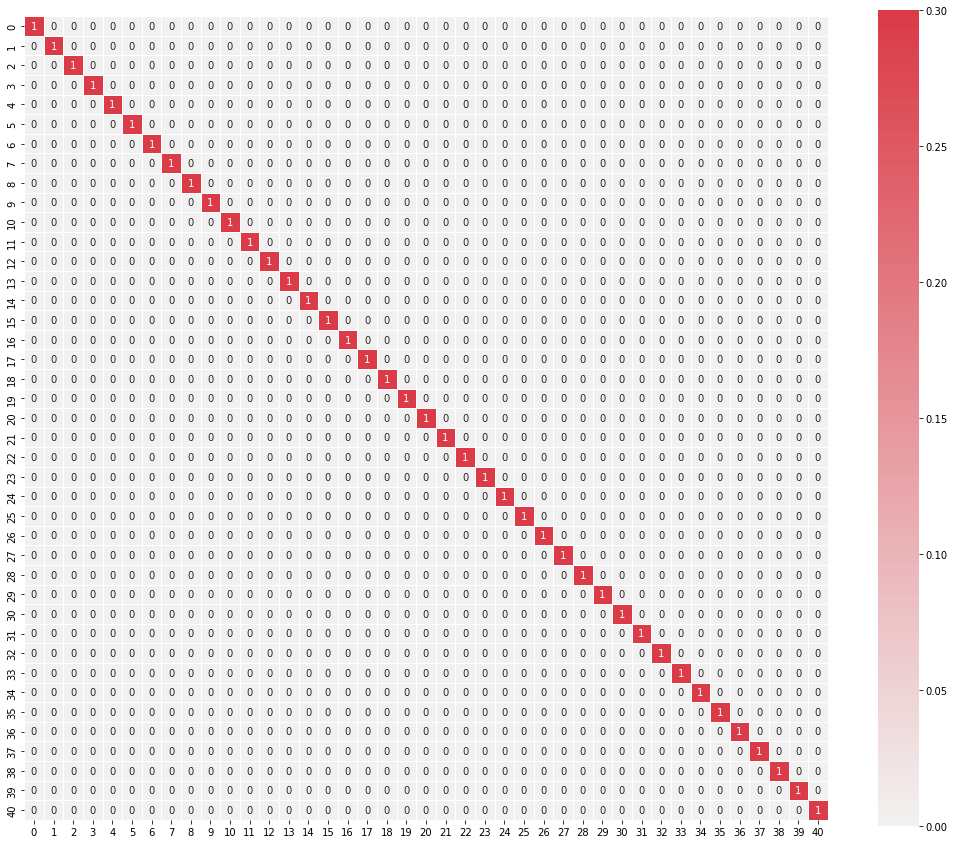

In [116]:
f, ax = plt.subplots(figsize = (18, 15))
cm = confusion_matrix(Y_test, y_pred)
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(cm, cmap = cmap, vmax = 0.3, center = 0,
            annot= True, square = True, linewidths= 0.5)

In [117]:
print("Classification report: ")
print(classification_report(Y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred))
print("Accuracy score: " + str(accuracy_score(y_pred, Y_test)*100) + '%')

Classification report: 
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
   

In [118]:
for i in range(0, len(Y_test)):
    print (str(i+1) + ' -> Pred: {0} => Actual: {1}'.format(y_pred[i], Y_test[i]))

1 -> Pred: Fungal infection => Actual: Fungal infection
2 -> Pred: Allergy => Actual: Allergy
3 -> Pred: GERD => Actual: GERD
4 -> Pred: Chronic cholestasis => Actual: Chronic cholestasis
5 -> Pred: Drug Reaction => Actual: Drug Reaction
6 -> Pred: Peptic ulcer diseae => Actual: Peptic ulcer diseae
7 -> Pred: AIDS => Actual: AIDS
8 -> Pred: Diabetes  => Actual: Diabetes 
9 -> Pred: Gastroenteritis => Actual: Gastroenteritis
10 -> Pred: Bronchial Asthma => Actual: Bronchial Asthma
11 -> Pred: Hypertension  => Actual: Hypertension 
12 -> Pred: Migraine => Actual: Migraine
13 -> Pred: Cervical spondylosis => Actual: Cervical spondylosis
14 -> Pred: Paralysis (brain hemorrhage) => Actual: Paralysis (brain hemorrhage)
15 -> Pred: Jaundice => Actual: Jaundice
16 -> Pred: Malaria => Actual: Malaria
17 -> Pred: Chicken pox => Actual: Chicken pox
18 -> Pred: Dengue => Actual: Dengue
19 -> Pred: Typhoid => Actual: Typhoid
20 -> Pred: hepatitis A => Actual: hepatitis A
21 -> Pred: Hepatitis B => 

In [121]:
dump(classifier, './Saved Model/model.joblib') 

['./Saved Model/model.joblib']

In [122]:
model = load('./Saved Model/naive_bayes_model.joblib')